<a href="https://colab.research.google.com/github/kimheeseo/2022_AI_SW_Programmingstudy/blob/main/penalization_fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

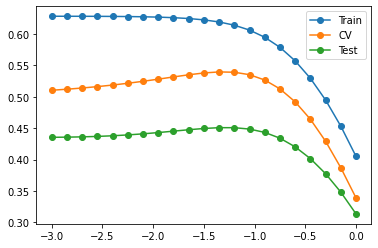

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.753e+05, tolerance: 7.360e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+05, tolerance: 5.984e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

0.5532330161943868

In [3]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read data
df = pd.read_csv('data07_diabetes.csv')
X = df.iloc[:,:-1]
y = df['Y']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.75,random_state=0)

# linear regression
from sklearn.linear_model import LinearRegression
f = LinearRegression()
f.fit(xtrain,ytrain)
f.intercept_,f.coef_
f.score(xtrain,ytrain)
f.score(xtest,ytest)

# ridge regression
from sklearn.linear_model import Ridge
f = Ridge(alpha=0.5)
f.fit(xtrain,ytrain)
f.intercept_,f.coef_
f.score(xtrain,ytrain)
f.score(xtest,ytest)

# lasso regression
from sklearn.linear_model import Lasso
f = Lasso(alpha=0.5)
f.fit(xtrain,ytrain)
f.intercept_,f.coef_
f.score(xtrain,ytrain)
f.score(xtest,ytest)

# Elastic Net regression
from sklearn.linear_model import ElasticNet
f = ElasticNet(alpha=0.1,l1_ratio=0.5)
f.fit(xtrain,ytrain)
f.intercept_,f.coef_
f.score(xtrain,ytrain)
f.score(xtest,ytest)

# select parameter using cross-validation
np.random.seed(0)
from sklearn.model_selection import cross_val_score
exp = np.linspace(-3,0,21)
alphas = 10**exp
s = np.zeros((len(alphas),3))
for n in range(s.shape[0]):
    f = Ridge(alpha=alphas[n])
    f.fit(xtrain,ytrain)
    s[n,0] = f.score(xtrain,ytrain)
    s[n,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
    s[n,2] = f.score(xtest,ytest)

plt.plot(exp,s[:,0],exp,s[:,1],exp,s[:,2],marker='o')
plt.legend(('Train','CV','Test'))
plt.show()

idx = np.argmax(s[:,1])
f = Ridge(alpha=alphas[idx])
f.fit(xtrain,ytrain)
f.coef_
f.score(xtest,ytest)

# parameter tunning in short
np.random.seed(0)
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
f = RidgeCV(alphas=alphas,cv=5)
f.fit(xtrain,ytrain)
f.alpha_
f.coef_
f.score(xtest,ytest)

# double parameter tunning for ElasticNet
np.random.seed(0)
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
exp = np.linspace(-3,0,21)
alphas = 10**exp
ratios = np.linspace(0,1,11)
n = 0
s = np.zeros((len(alphas)*len(ratios),5))
for i in range(len(alphas)):
    for j in range(len(ratios)):
        f = ElasticNet(alpha=alphas[i],l1_ratio=ratios[j])
        f.fit(xtrain,ytrain)
        s[n,0] = alphas[i]
        s[n,1] = ratios[j]
        s[n,2] = f.score(xtrain,ytrain)
        s[n,3] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
        s[n,4] = f.score(xtest,ytest)
        n = n+1
s[:,3].argmax()
s[:,4].max()

# simply
np.random.seed(0)
from sklearn.linear_model import ElasticNetCV
f = ElasticNetCV(alphas=alphas,l1_ratio=ratios,cv=5)
f.fit(xtrain,ytrain)
f.alpha_
f.l1_ratio_

# generally
np.random.seed(0)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
params = {'alpha': alphas, 'l1_ratio':ratios}
model = ElasticNet()
f = GridSearchCV(model,params,cv=5)
f.fit(xtrain,ytrain)
#f.best_param_
f.best_score_
